<a href="https://colab.research.google.com/github/Yoth999/AI-builder-snake-verification/blob/main/Copy_of_SnakeAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q --pre pytorch-ignite==0.5.0.dev20230325

#fastai
!pip install -q fastbook==0.0.29


!pip install gdown

exit()

In [ ]:
import shutil

directory_to_delete = "images"

try:
    shutil.rmtree(directory_to_delete)
    print(f"Directory '{directory_to_delete}' and its contents have been deleted.")
except OSError as e:
    print(f"Error deleting directory '{directory_to_delete}': {e}")


In [ ]:
import gdown
import shutil


file_id = '1LGuC_bYtp3Y833yyZHPPwjxsG5aIzQVH'
output = 'output_filename.zip'  # Specify the desired output filename and extension
gdown.download(f'https://drive.google.com/uc?id={file_id}', output, quiet=False)



In [ ]:

import os
import zipfile

zip_file_path = "output_filename.zip"  # Replace with the actual path to your ZIP file
extracted_folder = "images"  # Name of the folder where you want to extract

# Create the target directory if it doesn't exist
if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("Extraction complete.")
print("all extracted files are put in 'images' directory")

In [ ]:
!rm -r images/snakes/valid_mini
!mkdir images/snakes/valid_mini


import glob
import shutil


valid_folders = glob.glob('images/snakes/valid/*')
valid_fnames = []
for folder in valid_folders:
    valid_fnames += glob.glob(f'{folder}/*')[:10]
for i in range(24):
    os.mkdir(f'images/snakes/valid_mini/{str(i).zfill(2)}')
for fname in valid_fnames:
    shutil.copyfile(fname, f'images/snakes/valid_mini/{fname.split("/")[-2]}/{fname.split("/")[-1]}')

In [ ]:
import os

snakes = [
    'gpv_venomous', 'mpv_venomous', 'pv_venomous', 'tv_venomous', 'ela_venomous',
    'achor_non-venomous', 'bron_low-non-venomous', 'brow_low-non-venomous', 'colla_snake_low-non-venomous', 'cat_low-non-venomous',
    'kukri_snake_low-non-venomous', 'mocv_low-non-venomous', 'mud_low-non-venomous', 'sand_low-non-venomous', 'whip_low-non-venomous',
    'racer_rat_low-non-venomous', 'tree_low-non-venomous', 'WaBs_low-non-venomous', 'cylin_non-venomous',
    'parea_non-venomous', 'pytho_non-venomous', 'typl_non-venomous', 'xeno_non-venomous'
]

train_directory = "images/snakes/train"
valid_directory = "images/snakes/valid_mini"

for i, snake_name in enumerate(snakes):
    new_train_directory = os.path.join(train_directory, f"{str(i).zfill(2)}_{snake_name}")
    os.rename(os.path.join(train_directory, f"{str(i).zfill(2)}"), new_train_directory)

    new_valid_directory = os.path.join(valid_directory, f"{str(i).zfill(2)}_{snake_name}")
    os.rename(os.path.join(valid_directory, f"{str(i).zfill(2)}"), new_valid_directory)


In [ ]:
from fastbook import *

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(valid_name='valid_mini'),
    get_y=parent_label,
    batch_tfms=aug_transforms(size=224),  # Add a comma here
    item_tfms=Resize(224)
)
dls = dblock.dataloaders('images/snakes/', bs=64)


In [ ]:
dls.train.show_batch(max_n=9,nrows=3)

In [ ]:
learn = cnn_learner(dls, resnet101, metrics=accuracy)
learn.fine_tune(epochs=10, freeze_epochs=2, base_lr=2e-3)

In [ ]:

learn.show_results() #true label - บน; prediction - ล่าง

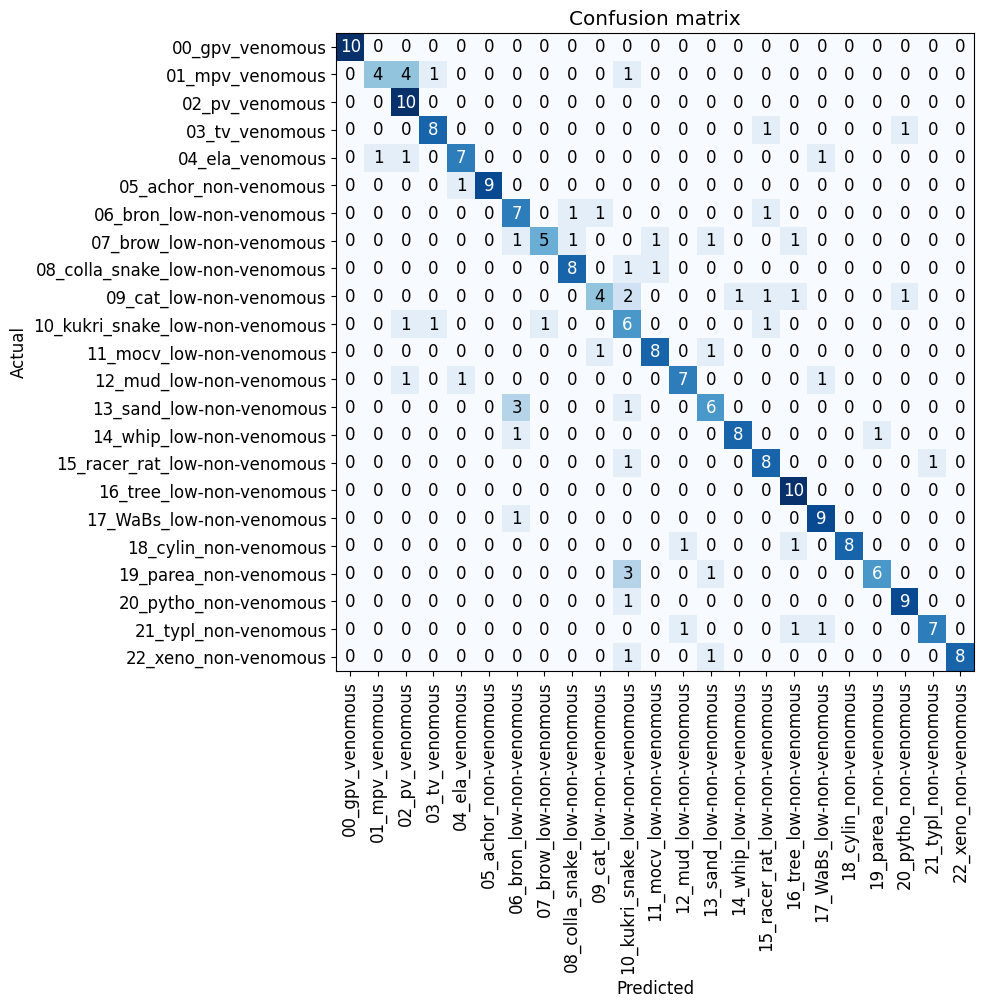

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
interp.print_classification_report()